---

[Dugo, Giorgio, Piagato, The Multivariate Fractional Ornstein-Uhlenbeck Process](https://arxiv.org/abs/2408.03051) - Theorem 2.4

---

Simplification of the integral 

$$
    I_{ij}(h) = \int_{0}^{h} du \int_{-\infty}^{0} e^{\alpha_i u + \alpha_j v}
    (u-v)^{H_{ij} - 2} dv
$$

where $h,\alpha_{i},\alpha_{j}> 0$ and $H_i,H_j \in (0,1) \setminus \{1/2\}$
with $H_{ij} = H_i + H_j \in (0,2) \setminus \{1\}$.

For $H_{ij} \in (0,2) \setminus \{1\}$, we have

$$
I_{ij}(h)
=
\frac{1}{(\alpha_i+\alpha_j)(H_{ij}-1)}
\Big[
\alpha_j^{1-H_{ij}} e^{(\alpha_i+\alpha_j)h}\,\Gamma\!\left(H_{ij},\alpha_j h\right)
- h^{H_{ij}-1} e^{\alpha_i h}
- \alpha_j^{1-H_{ij}}\Gamma(H_{ij})
+ h^{H_{ij}-1}\,{}_1F_{1}\!\left(H_{ij}-1;\,H_{ij};\,\alpha_i h\right)
\Big],
$$

If $H_{ij} = 2$, it simplifies to

$$
    I_{ij}(h) = \frac{1}{\alpha_i \alpha_j} \left(e^{\alpha_i h} - 1\right)
$$

Without the confluent hypergeometric function $_1F_1$, this is 

$$
    I_{ij}(h)
=
\int_{0}^{h}
\frac{\alpha_j^{\,1-H_{ij}}}{H_{ij}-1}
\,e^{(\alpha_i+\alpha_j)u}
\left[
\Gamma\!\left(H_{ij},\,\alpha_j u\right)
-
(\alpha_j u)^{H_{ij}-1}e^{-\alpha_j u}
\right]
\,du
$$

In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from integral import I_closed_form, I_closed_form_H_2, I_quad

mpl.rcParams["figure.figsize"] = (8, 6)
sns.set_theme("talk")

Case $H_i + H_j = 2$

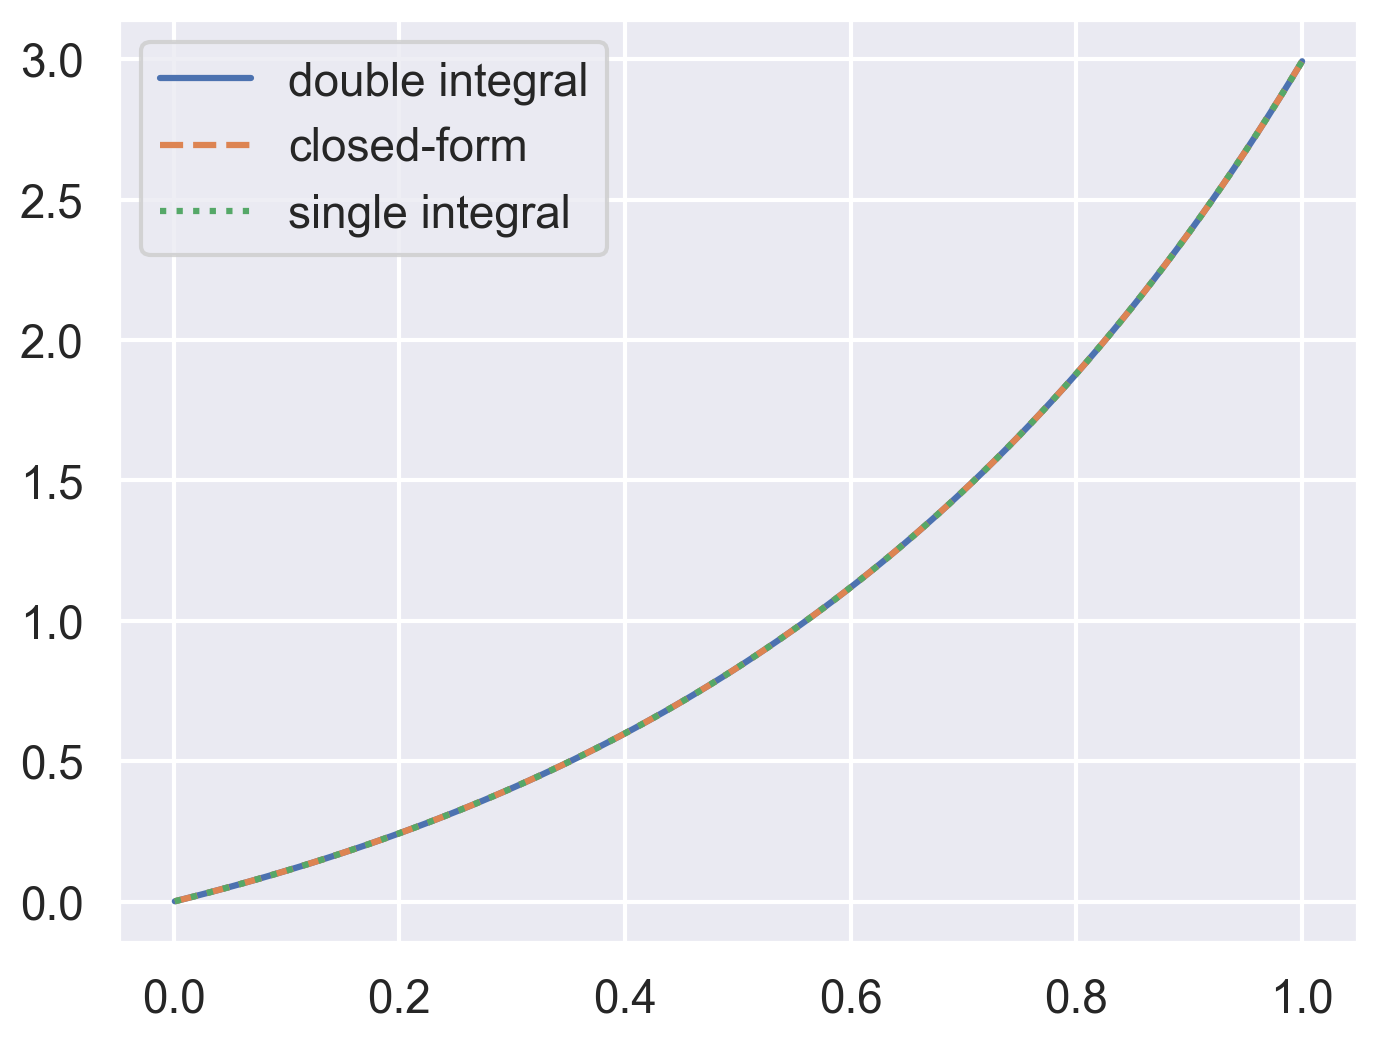

In [3]:
# set parameters
a_i, a_j, H_i, H_j = 1.9, 1.0, 1.0, 1.0
hs = np.linspace(1e-3, 1.0, 100)

if not H_i + H_j == 2:
    raise ValueError("H_i + H_j must be 2")

res_double_integral = np.array([I_quad(h, a_i, a_j, H_i, H_j) for h in hs])
res_closed_form = I_closed_form_H_2(hs, a_i, a_j)
res_single_integral = np.array(
    [I_closed_form(h, a_i, a_j, H_i, H_j, opt="single_integral") for h in hs]
)

# plot
fig, ax = plt.subplots()
ax.plot(hs, res_double_integral, label="double integral")
ax.plot(hs, res_closed_form, "--", label="closed-form")
ax.plot(hs, res_single_integral, ":", label="single integral")
ax.legend()
plt.show()

Case $0 < H_{i} + H_{j} < 1$

Plotting for H_i=0.3, H_j=0.2


/Users/florianbourgey/projects/mfou/integral.py:51: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = integrate.quad(
/Users/florianbourgey/projects/mfou/integral.py:56: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(inner_int_quad, 0, h)[0]
/Users/florianbourgey/projects/mfou/integral.py:56: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 

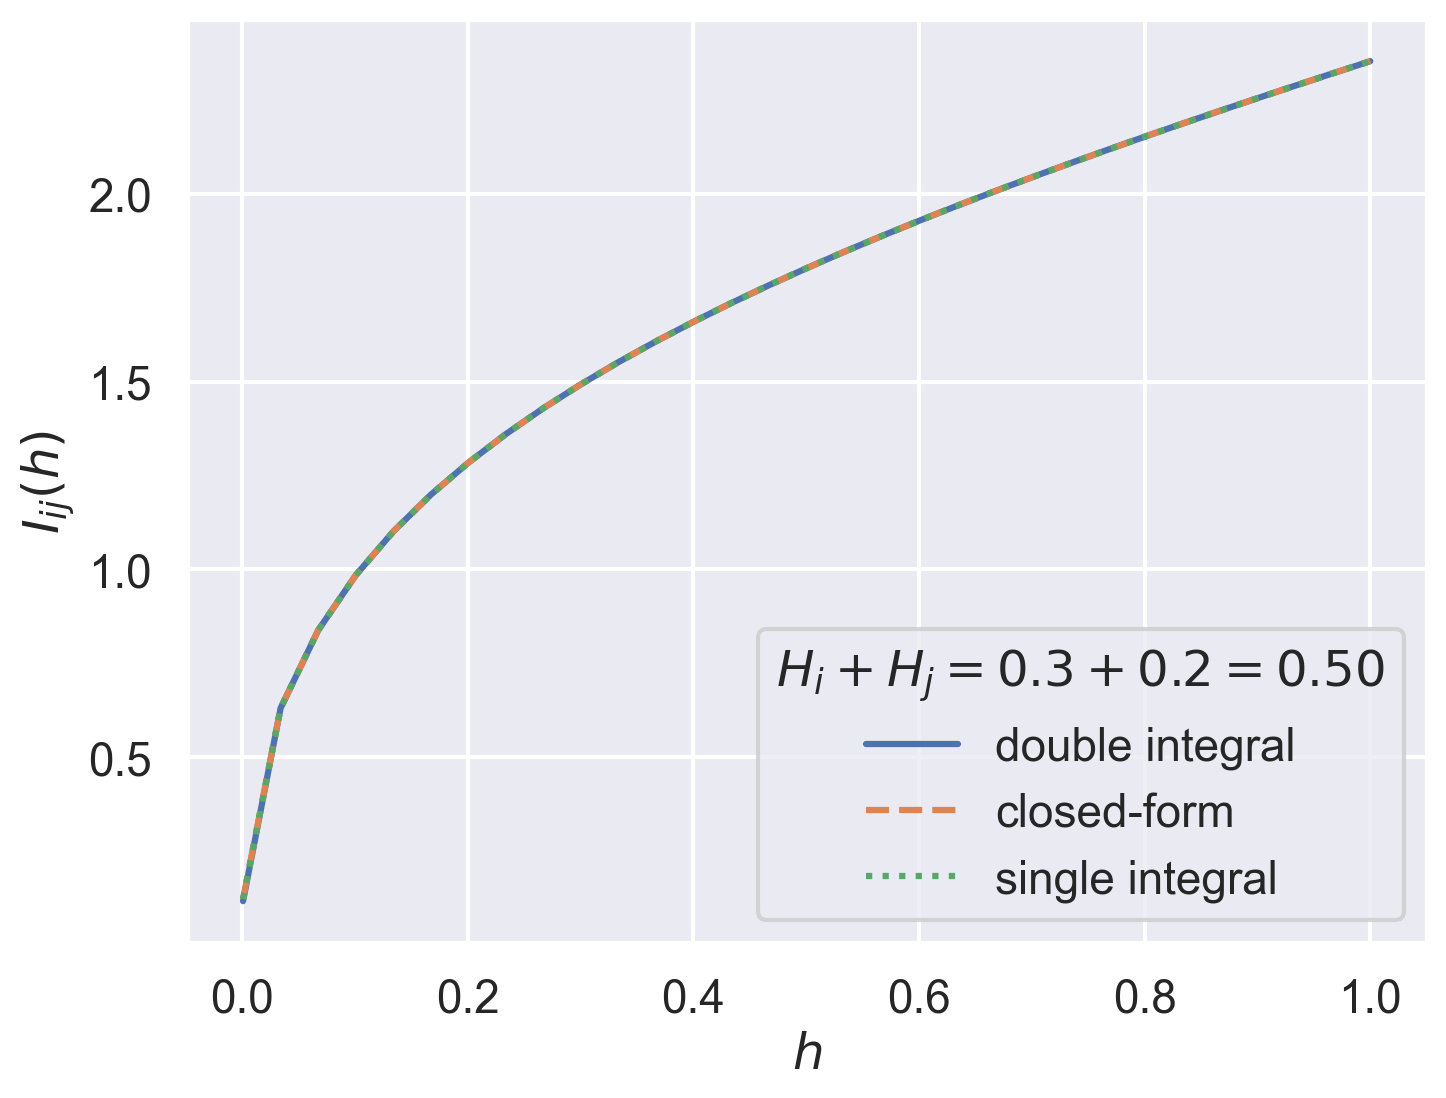

Plotting for H_i=0.6, H_j=0.3


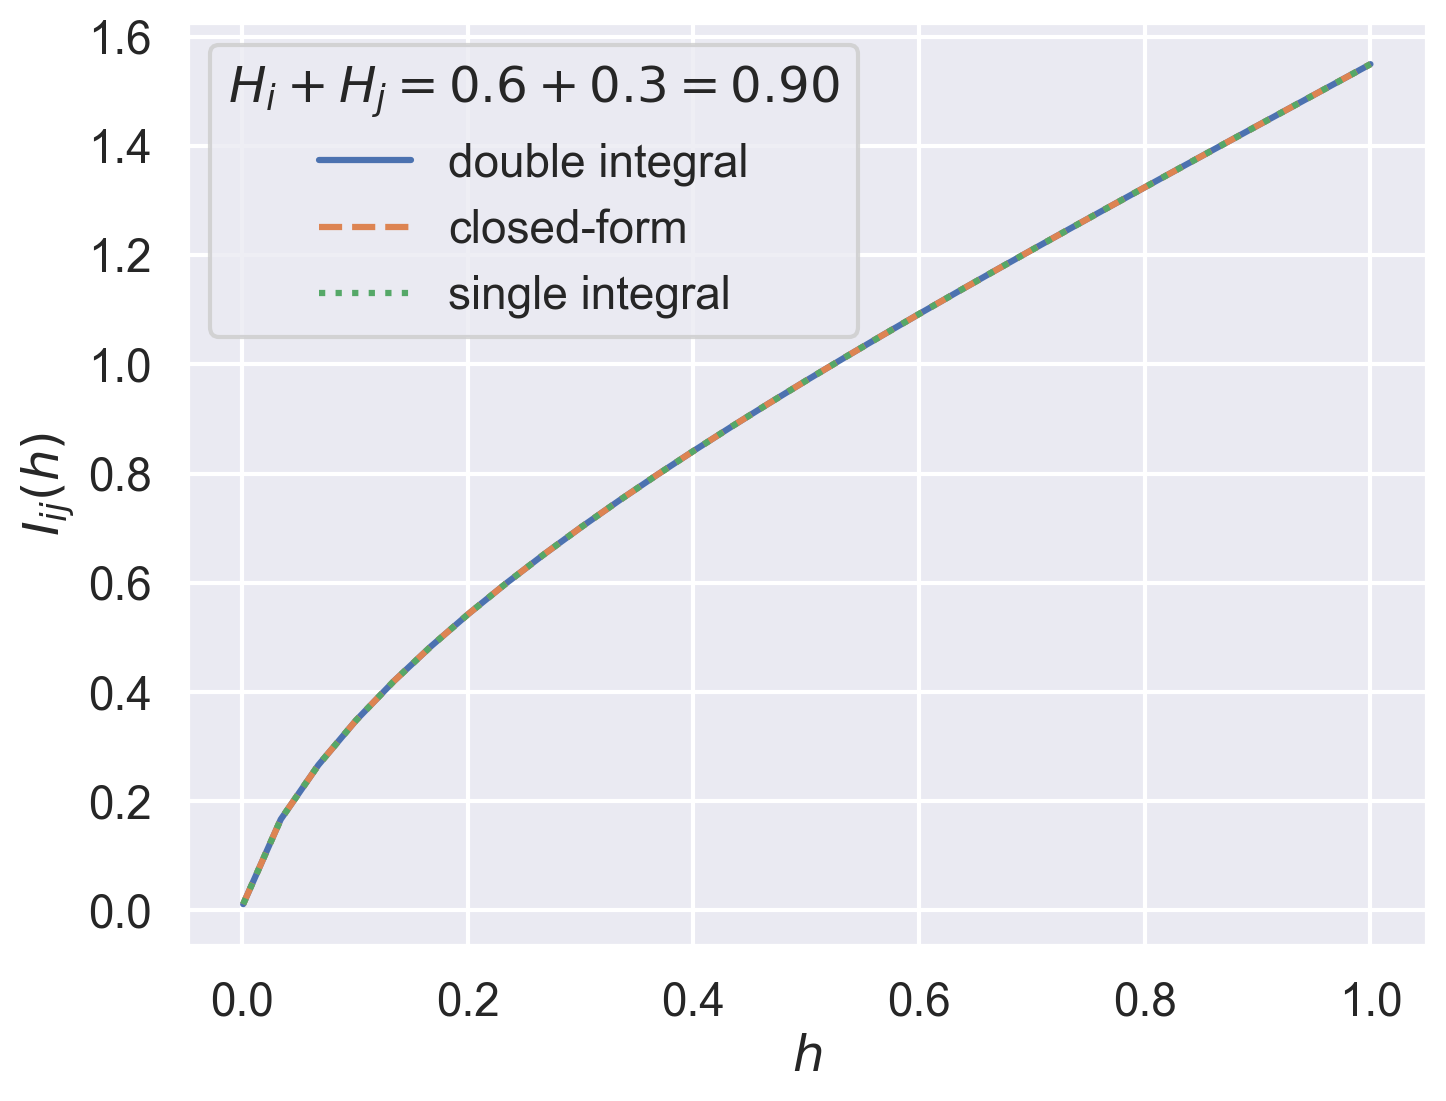

Plotting for H_i=0.8, H_j=0.1


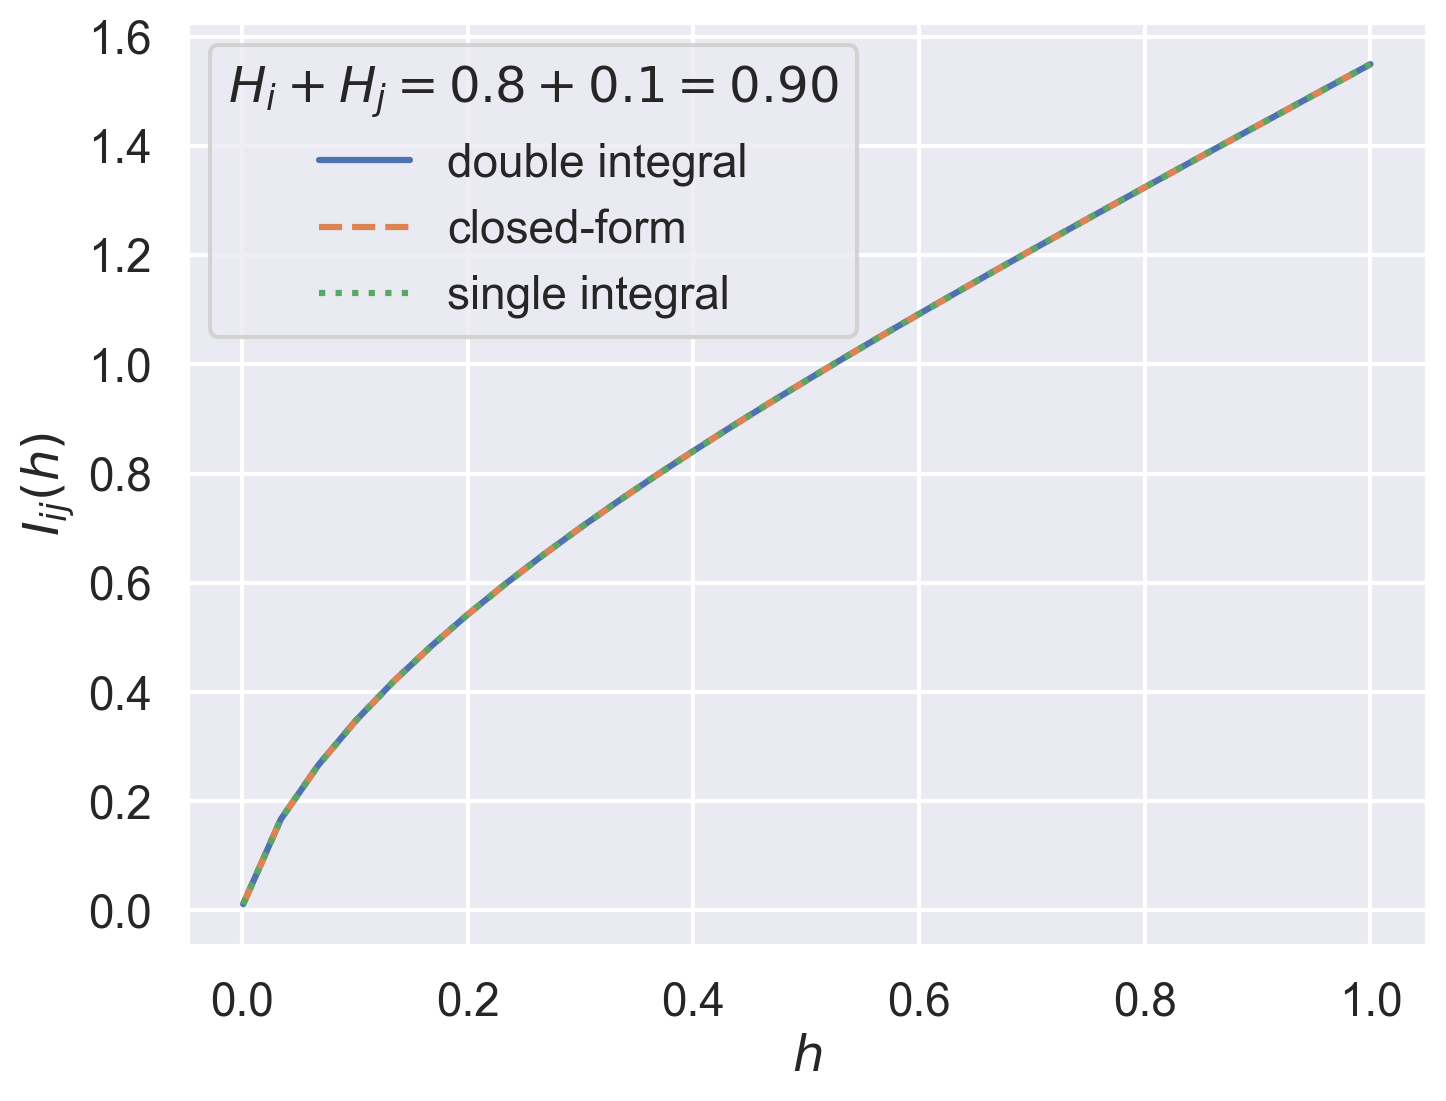

Plotting for H_i=0.2, H_j=0.5


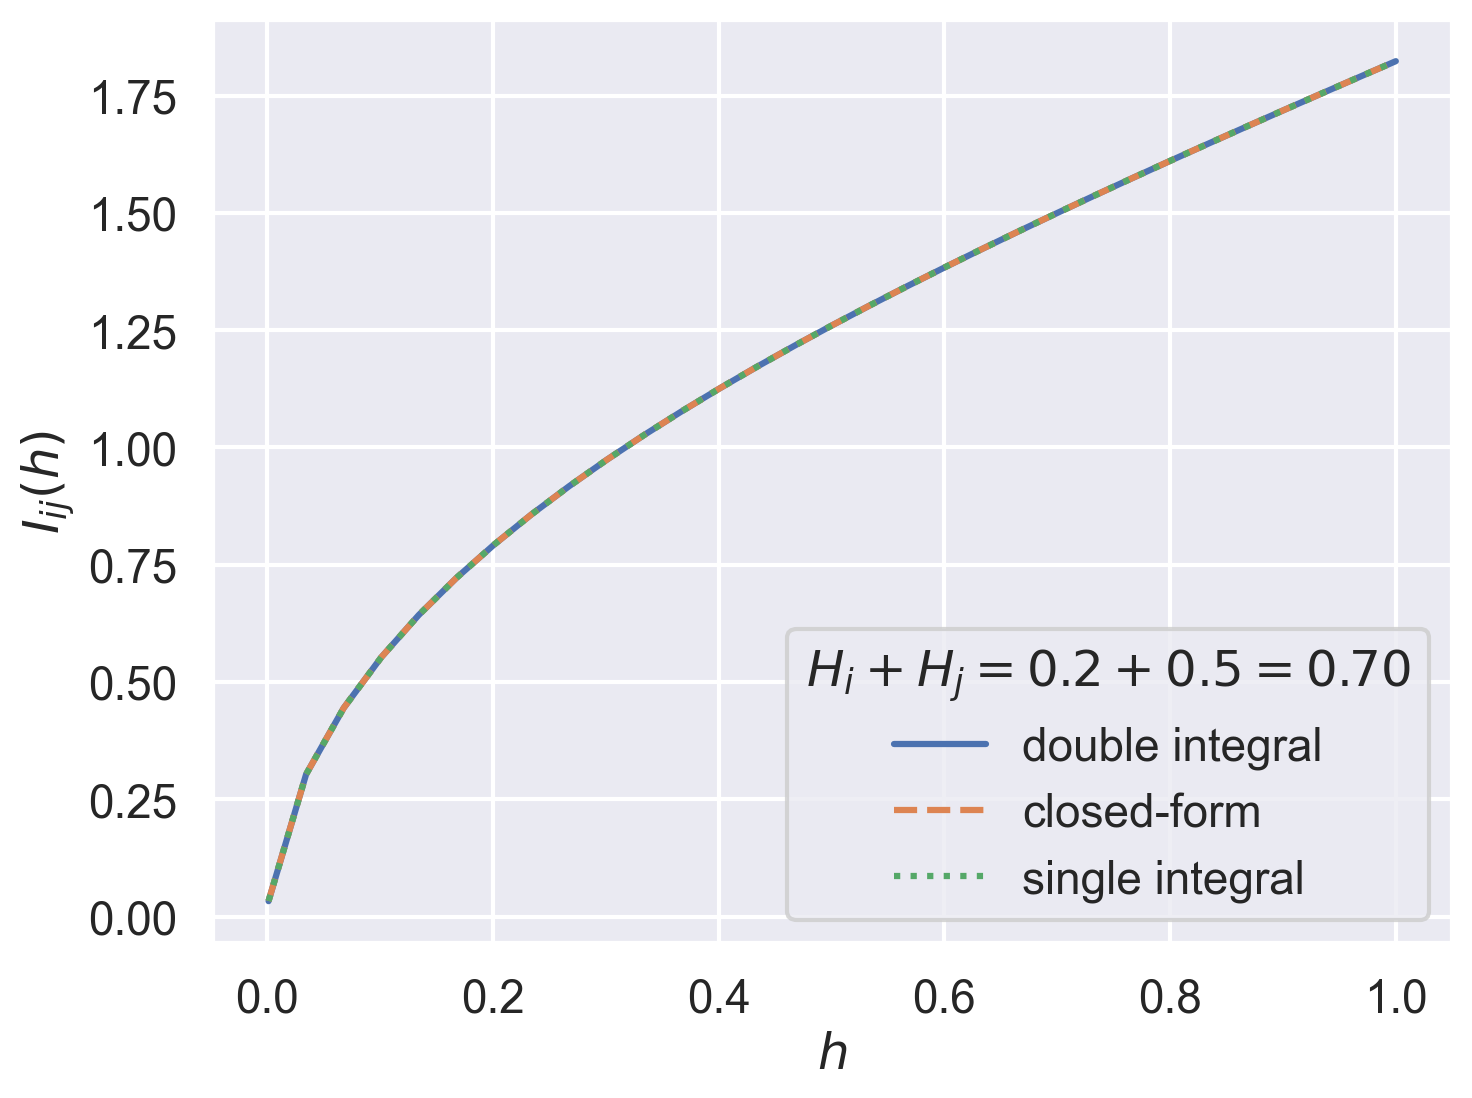

In [7]:
# set parameters
a_i, a_j = 0.8, 1.2
hs = np.linspace(1e-3, 1.0, 31)

H_i_H_j = [(0.3, 0.2), (0.6, 0.3), (0.8, 0.1), (0.2, 0.5)]

for H_i, H_j in H_i_H_j:
    print(f"Plotting for H_i={H_i}, H_j={H_j}")

    if not H_i + H_j < 1:
        raise ValueError("H_i + H_j must be in (0, 1)")

    res_double_integral = np.array([I_quad(h, a_i, a_j, H_i, H_j) for h in hs])
    res_closed_form = np.array([I_closed_form(h, a_i, a_j, H_i, H_j) for h in hs])
    res_single_integral = np.array(
        [I_closed_form(h, a_i, a_j, H_i, H_j, opt="single_integral") for h in hs]
    )

    # plot
    fig, ax = plt.subplots()
    ax.plot(hs, res_double_integral, label="double integral")
    ax.plot(hs, res_closed_form, "--", label="closed-form")
    ax.plot(hs, res_single_integral, ":", label="single integral")
    ax.set_xlabel("$h$")
    ax.set_ylabel(r"$I_{ij}(h)$")
    ax.legend(title=rf"$H_i + H_j = {H_i} + {H_j} = {H_i + H_j:.2f}$")
    plt.show()

Plotting for H_i=0.6, H_j=0.5


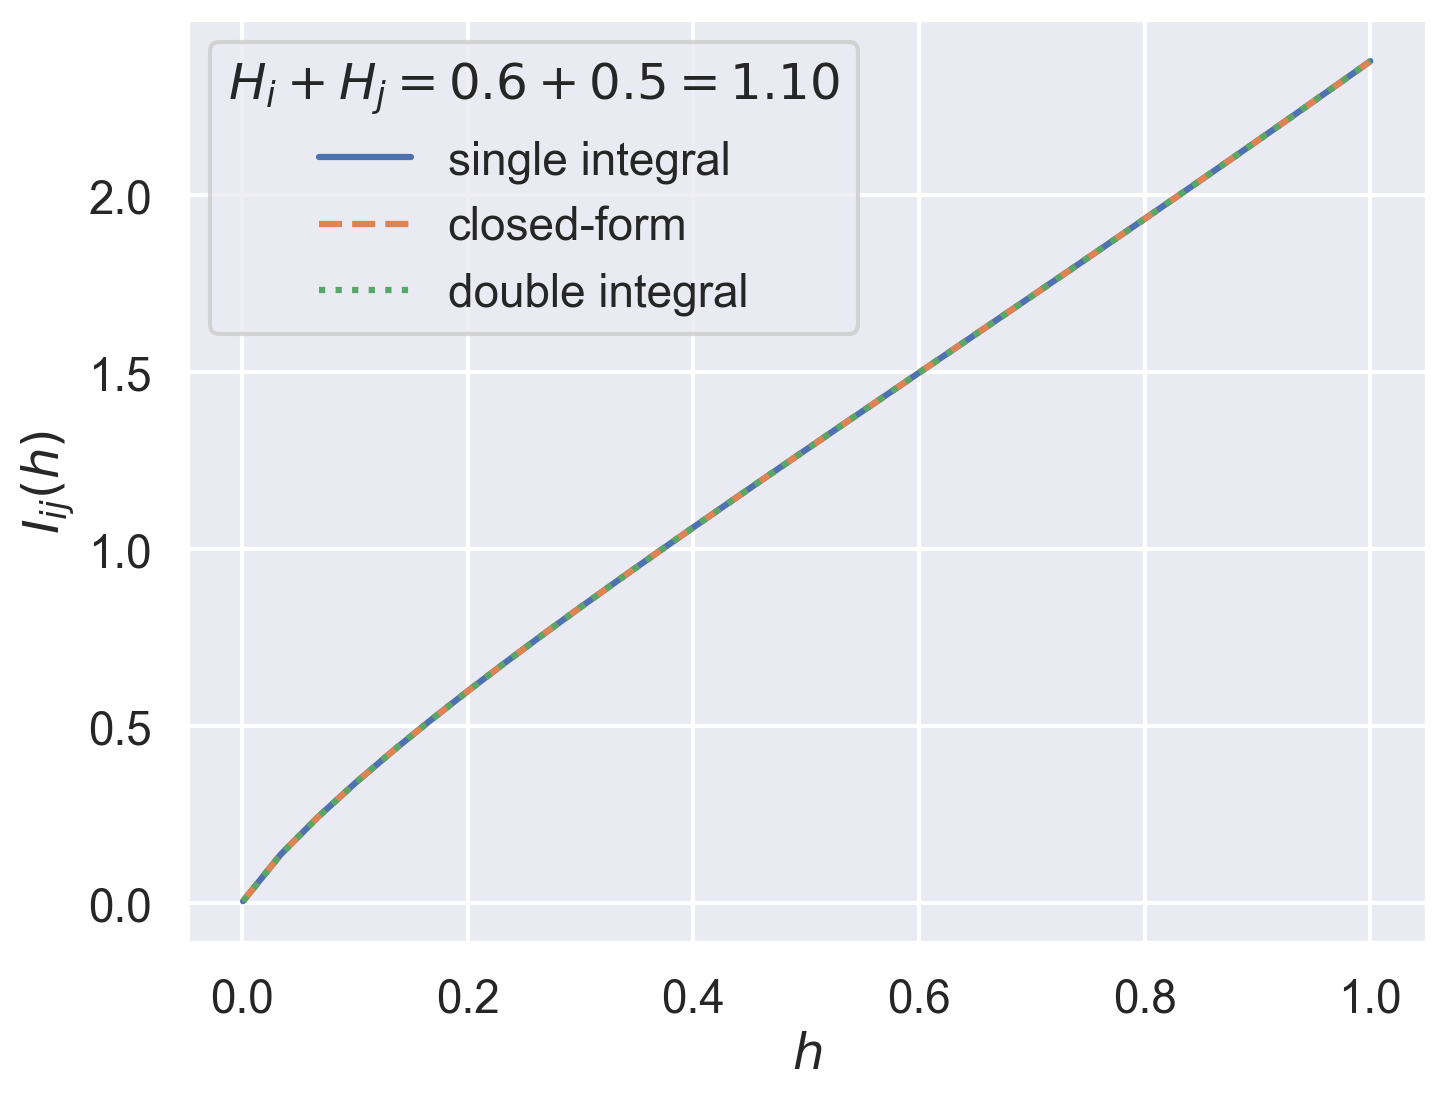

Plotting for H_i=0.8, H_j=0.4


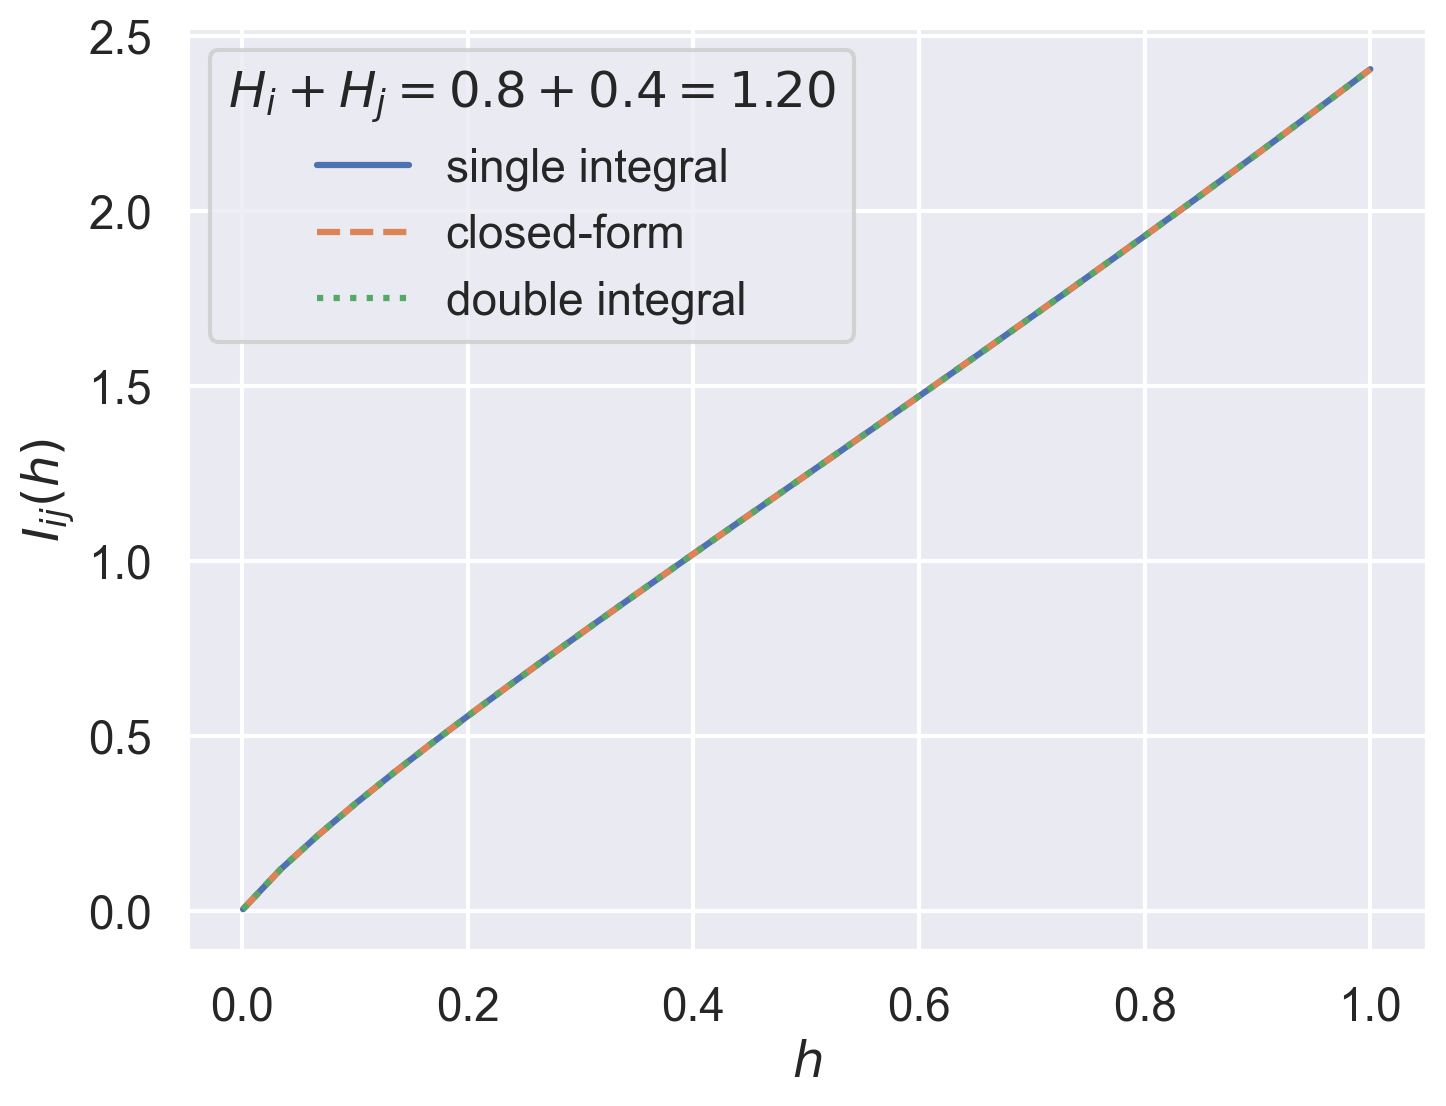

Plotting for H_i=1.0, H_j=0.3


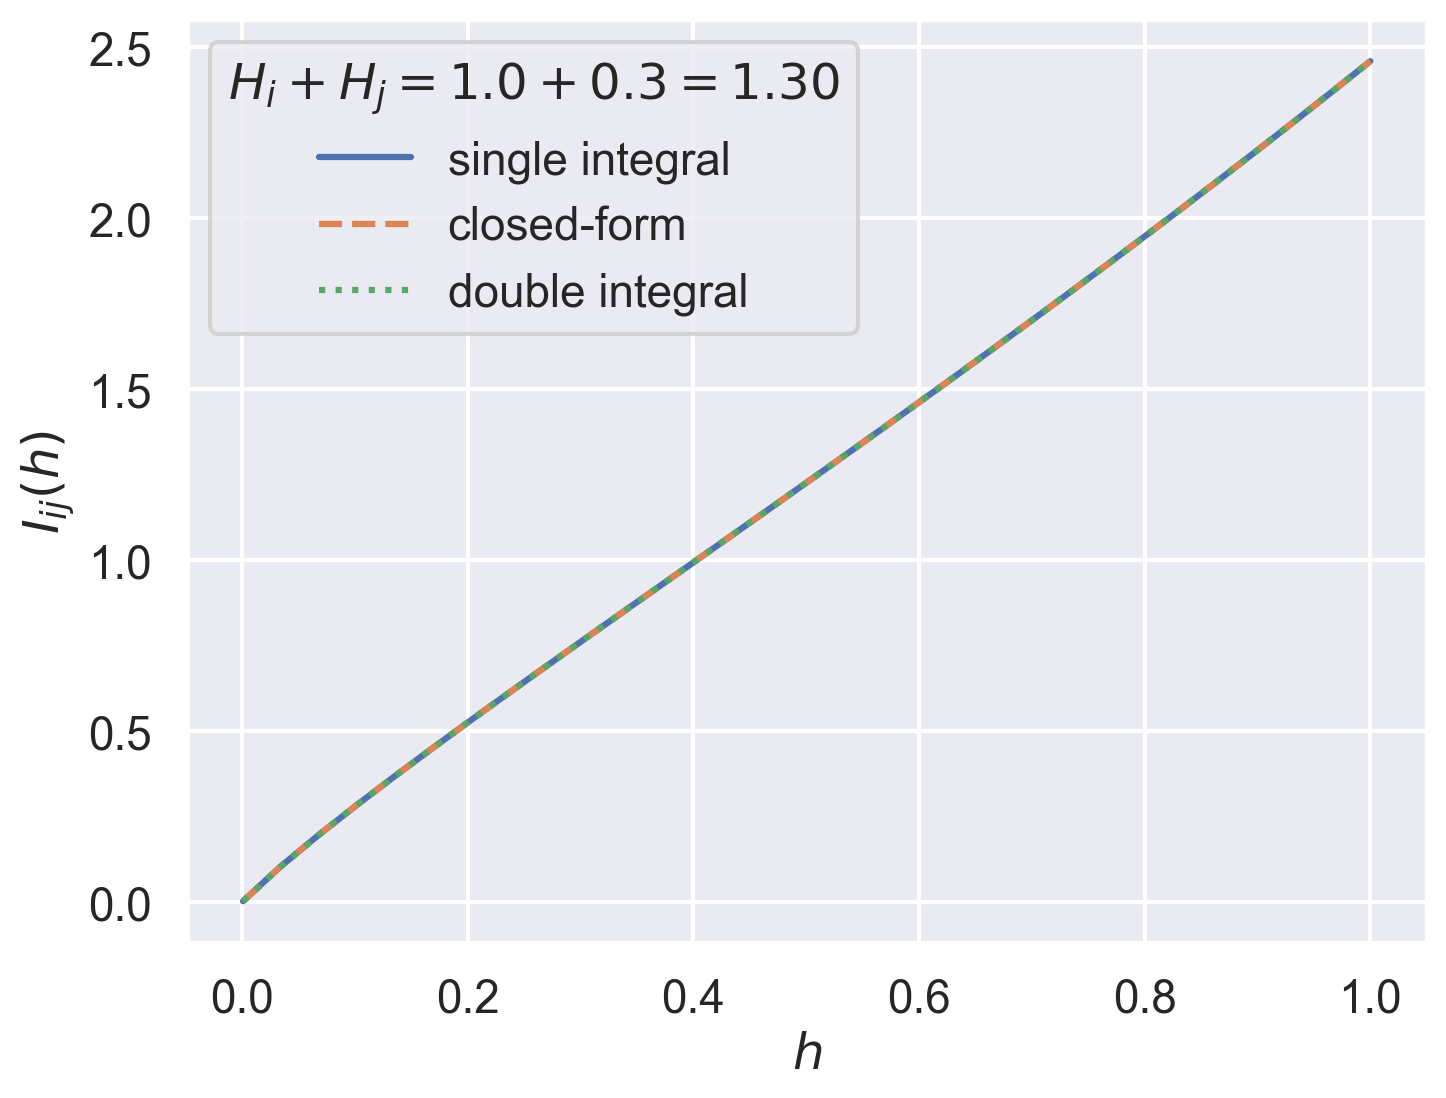

Plotting for H_i=1.2, H_j=0.2


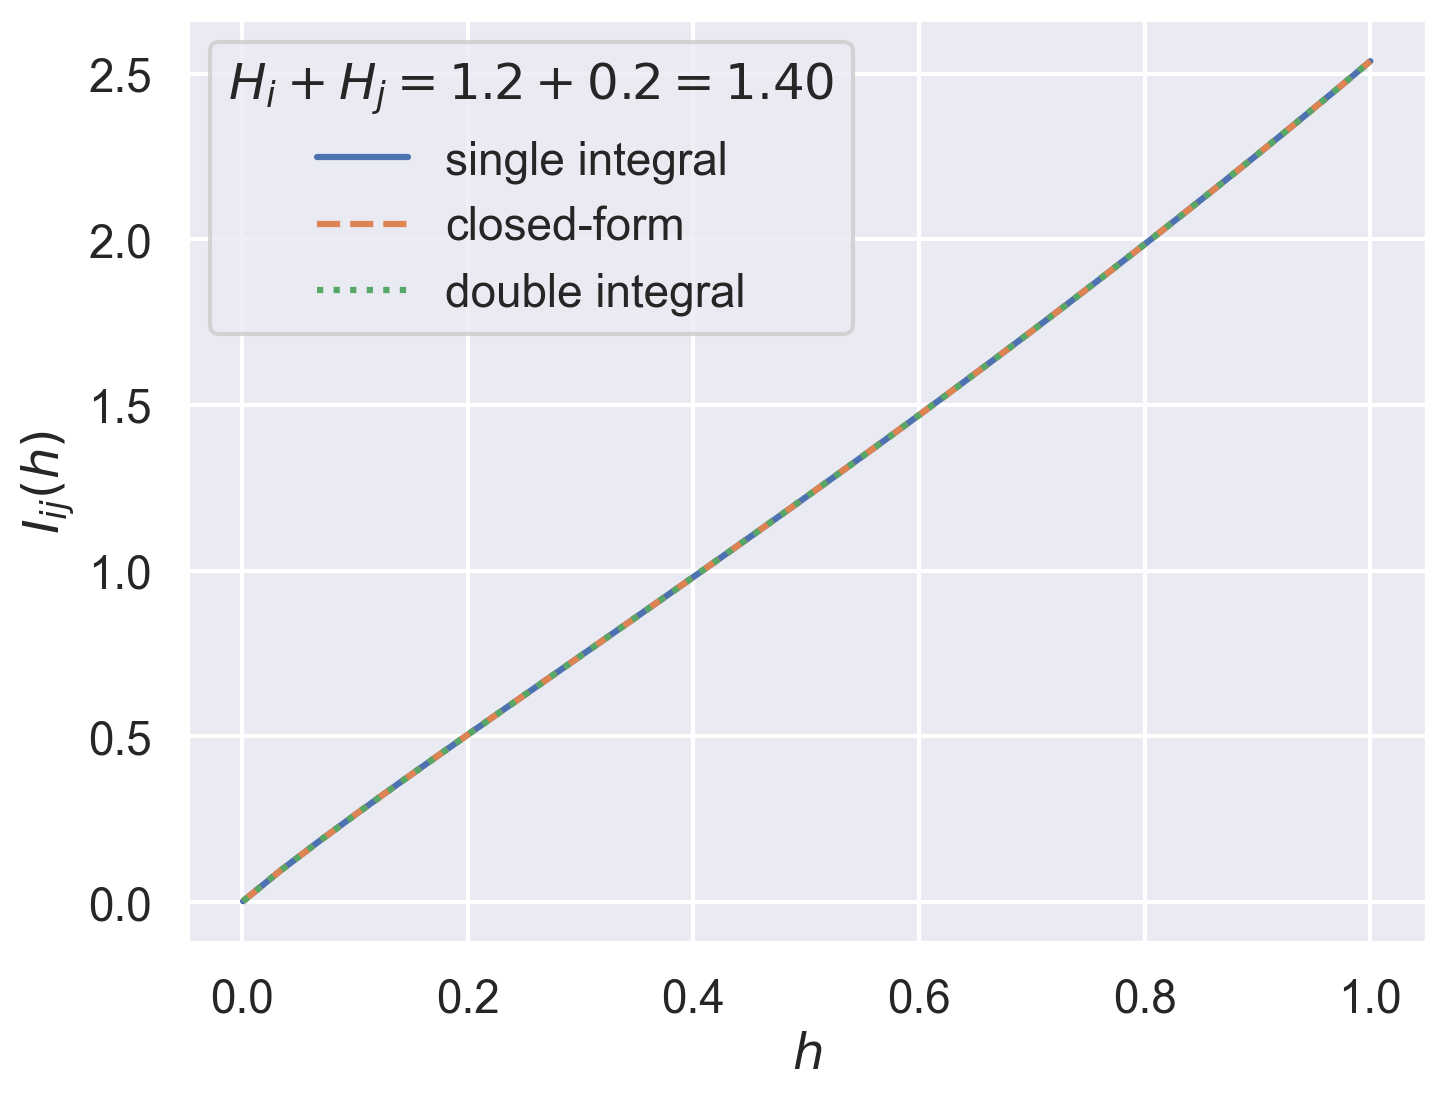

In [ ]:
# set parameters

a_i, a_j = 0.7, 0.4
hs = np.linspace(1e-3, 1.0, 31)

H_i_H_j = [(0.6, 0.5), (0.8, 0.4), (1.0, 0.3), (1.2, 0.2)]


for H_i, H_j in H_i_H_j:
    print(f"Plotting for H_i={H_i}, H_j={H_j}")
    if not H_i + H_j > 1:
        raise ValueError("H_i + H_j must be in (1, 2]")

    res_single_integral = np.array([I_quad(h, a_i, a_j, H_i, H_j) for h in hs])
    res_closed_form = np.array([I_closed_form(h, a_i, a_j, H_i, H_j) for h in hs])
    res_double_integral = np.array(
        [I_closed_form(h, a_i, a_j, H_i, H_j, opt="single_integral") for h in hs]
    )

    # plot
    fig, ax = plt.subplots()
    ax.plot(hs, res_single_integral, label="single integral")
    ax.plot(hs, res_closed_form, "--", label="closed-form")
    ax.plot(hs, res_double_integral, ":", label="double integral")
    ax.set_xlabel("$h$")
    ax.set_ylabel(r"$I_{ij}(h)$")
    ax.legend(title=rf"$H_i + H_j = {H_i} + {H_j} = {H_i + H_j:.2f}$")
    plt.show()